# Анализ качества воды

Ниже представлен воображаемый набор данных о качестве воды в городской среде. Набор данных используется для образовательных целей. В рамках этого набора данных, анализ и классификация качества воды будет проводиться по 20 количественным признакам:

1. aluminium - уровень наличия аллюминия в литре воды
2. ammonia - уровень наличия аммиака в литре воды
3. arsenic - уровень наличия мышьяка в литре воды
4. barium - уровень наличия бария в литре воды
5. cadmium - уровень наличия кадмия в литре воды
6. chloramine - уровень наличия хлорамина в литре воды
7. chromium - уровень наличия хрома в литре воды
8. copper - уровень наличия меди в литре воды
9. flouride - уровень наличия фторида в литре воды
10. bacteria - уровень наличия бактерий в литре воды
11. viruses - уровень наличия вирусов в литре воды
12. lead - уровень наличия свинца в литре воды
13. nitrates - уровень наличия нитратов в литре воды
14. nitrites - уровень наличия нитритов в литре воды
15. mercury - уровень наличия ртути в литре воды
16. perchlorate - уровень наличия перхлората в литре воды
17. radium - уровень наличия радия в литре воды
18. selenium - уровень наличия селена в литре воды
19. silver - уровень наличия серебра в литре воды
20. uranium - уровень наличия урана в литре воды

21ый признак - is_safe (качество воды), присутствующий в наборе данных, предлагается считать категориальным, и будет впоследствии использоваться в качестве класса.

Каждый образец воды предлагается отнести к одному из двух классов (безопасна к употреблению или нет) согласно признакам выше.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data = pd.read_csv('waterQuality1.csv', sep = ',', engine = 'python', skipinitialspace = True, na_values = ['#NUM!'])
print(data.shape)
print()

columns = data.columns.tolist()
print(columns)
print()

numeric_columns = columns[:-1]
print(numeric_columns)

(7999, 21)

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium', 'is_safe']

['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']


## Предобработка и визуализация набора данных

Во-первых, стоит удалить информацию о тех образцах, в которых присутствуют неожиданные значения (мусор), мешающие дальнейшему анализу:

In [2]:
data = data.dropna()
print(data.shape)

(7996, 21)


Была удалена информация о 3ёх образцах.

Во-вторых, следует удалить дубликаты:

In [3]:
data.drop_duplicates()
print(data.shape)

(7996, 21)


Дубликатов не было.

В-третьих, можно определить, есть ли пропущенные значения в признаках:

In [4]:
data[columns].count(axis = 0)

aluminium      7996
ammonia        7996
arsenic        7996
barium         7996
cadmium        7996
chloramine     7996
chromium       7996
copper         7996
flouride       7996
bacteria       7996
viruses        7996
lead           7996
nitrates       7996
nitrites       7996
mercury        7996
perchlorate    7996
radium         7996
selenium       7996
silver         7996
uranium        7996
is_safe        7996
dtype: int64

Оказалось, что пропущенных значений нет.

В-четвёртых, можно определить, есть ли выбросы в значениях количественных признаков:

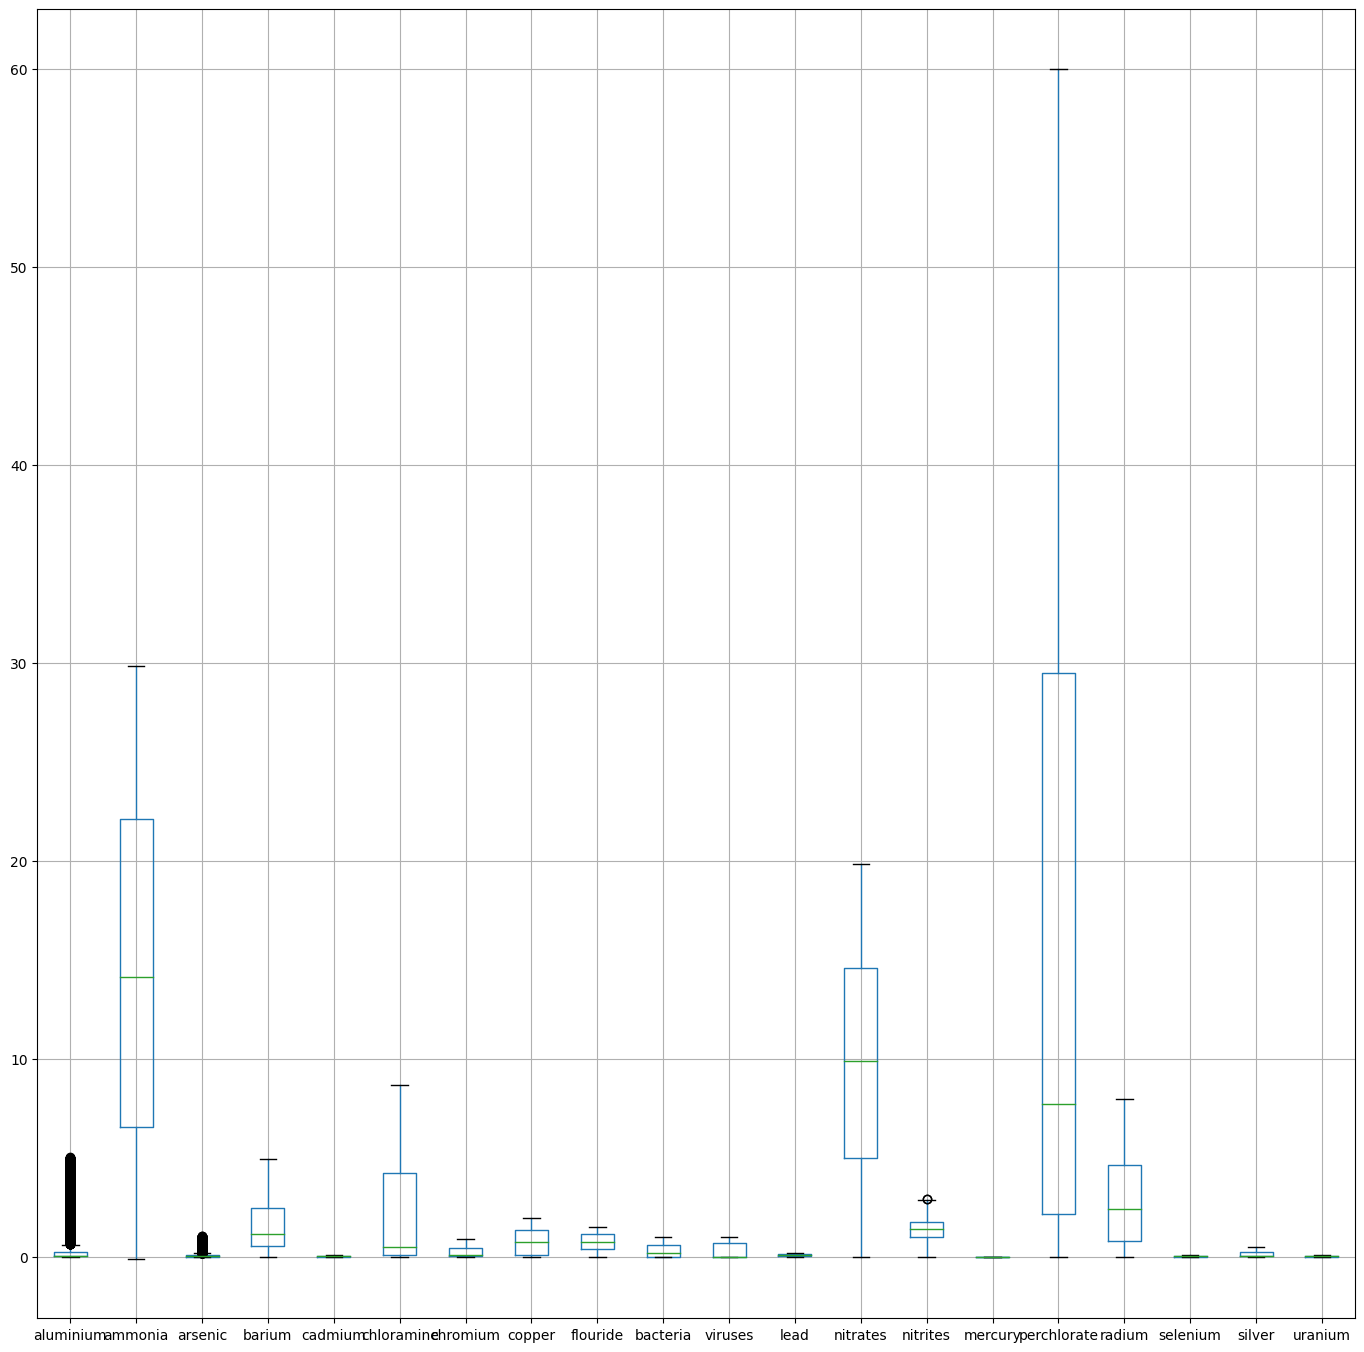

In [5]:
data.boxplot(numeric_columns, figsize=(17,17))
pass

Согласно критерию outlier > 1.5 * IQR, где IQR = Q3 - Q1 (Q3 и Q1 - 75% и 25% квантили соответственно), имеются выбросы в следующих признаках: aluminium, arsenic, nitrites.

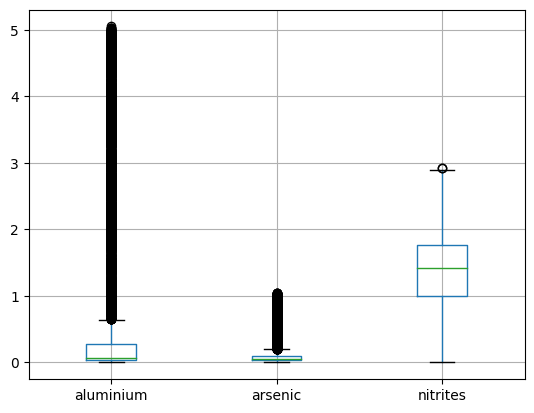

In [6]:
data[['aluminium', 'arsenic', 'nitrites']].boxplot()
pass

В признаках aluminium и arsenic таких значений относительно много (не более 25%) и судя по графику "ящик с усами", распределены они на этом участке "равномерно" - т.е. предлагается не считать это выбросами. У признака nitrites, исходя из графика, один выброс и он близок к 75% квантилю - можно это не считать выбросом.

В итоге предлагается не удалять образцы с такими выбросами. Вдобавок не ясно, что является точным критерием определения выброса, ведь как уже было ранее упомянуто, эти данные теоретизированы. А с помощью критерия outlier > 1.5 * IQR можно было бы попытаться отсеять "единичные" выбросы, которые сильно отличаются от 75% и 25% квантилей, но как оказалось - в этом нет необходимости.

В-пятых, можно определить неинформативные (малозначительные, нерелевантные) признаки. Из графика "ящик с усами", построенного ранее, на первый взгляд может показаться, что есть несколько таких признаков (из-за низкого значения стандартного отклонения относительно других признаков). Это признаки: cadmium, selenium, uranium, mercury. Можно отдельно построить статистику для них:

In [7]:
data[['cadmium', 'selenium', 'uranium', 'mercury']].describe()

,cadmium,selenium,uranium,mercury
count,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.042803,0.049684,0.044672,0.005193
std,0.036049,0.028773,0.026906,0.002967
min,0.000000,0.000000,0.000000,0.000000
25%,0.008000,0.020000,0.020000,0.003000
50%,0.040000,0.050000,0.050000,0.005000
75%,0.070000,0.070000,0.070000,0.008000
max,0.130000,0.100000,0.090000,0.010000


Из-за теоретической природы набора данных не ясно, по какому критерию можно определить, является ли признак малоинформативным. Предлагается пока не удалять данные признаки.

Обработка категориальных признаков не требуется.

Необходимо проверить, сбалансированы ли с точки зрения набора данных два класса:

In [8]:
print(data['is_safe'].value_counts())

0.0    7084
1.0     912
Name: is_safe, dtype: int64


В данном наборе данных классы не сбалансированы.

Краткая информация о нескольких образцах из набора данных:

In [9]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1.0
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1.0
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0.0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1.0
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1.0


In [10]:
data[numeric_columns].describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


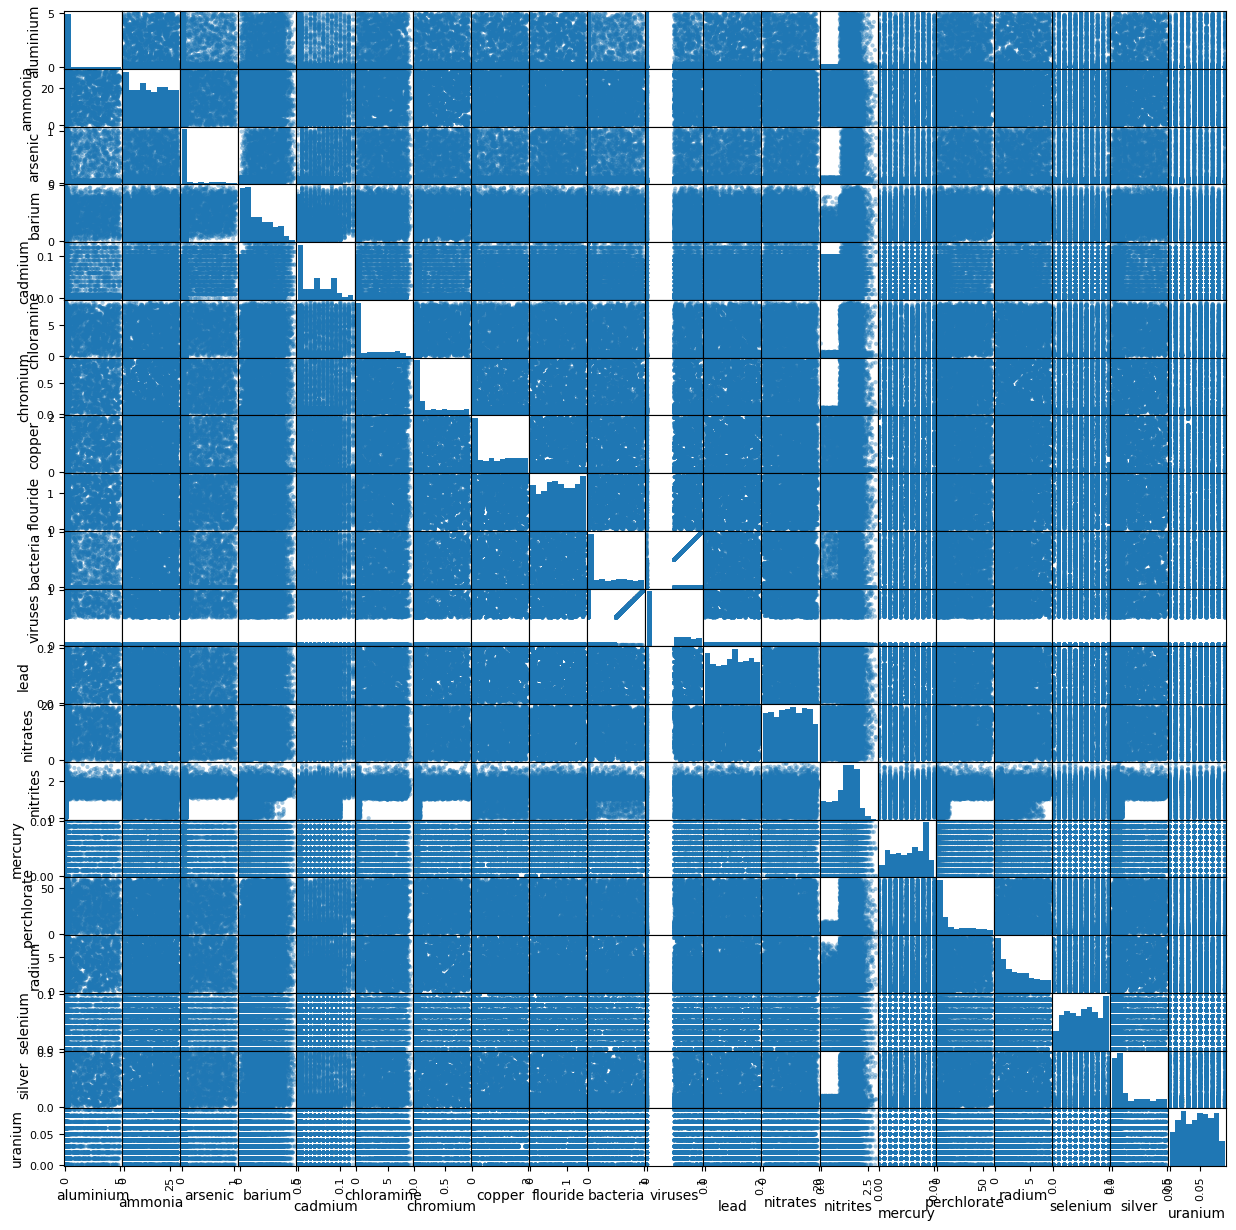

In [11]:
from pandas.plotting import scatter_matrix 
scatter_matrix(data[numeric_columns], alpha = .40, figsize = (15, 15))
pass

In [12]:
data[numeric_columns].corr()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,-0.071040,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,0.105856,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,0.011596,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,-0.002429,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,0.021255,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,0.003432,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,0.002193,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,0.006183,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,0.018261,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,0.618535,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077


Из диаграмм рассеяния видно, что наибольшая линейная зависимость имеется между парами признаков: (bacteria, viruses). Коэффициент корреляции Пирсона между этой парой признаков составляет 0.618480.

Из матрицы корреляции видно, что в какой-то немалой степени присутствует линейная зависимость между следующими парами признаков в порядке невозрастания: (perchlorate, chloramine), (chloramine, chromium), (chloramine, silver), (chromium, silver), (perchlorate, silver).

Признаки, задействованные в данных парах, являются первыми кандидатами на то, чтобы считать их наиболее коррелированными между соответствующими признаками. В случае, если в будущем предсказания обученного классификатора будут неудовлетворительными, то можно будет избавиться от коррелированных признаков, например, методом PCA.

## Обучение классификаторов

Разделим выборку на обучающую и тестовую с сохранением баланса с точки зрения признака is_safe. 30% идет в тестовую выборку.

Также следует выполнить нормализацию набора данных по каждому признаку (масштабирование). Это будет полезно, например, для kNN-классификатора, поскольку данный классификатор оперирует понятием "расстояние".

In [13]:
normalized_data=(data-data.min())/(data.max()-data.min())

X = normalized_data.drop(('is_safe'), axis = 1)
y = normalized_data['is_safe']
feature_names = X.columns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

5597 2399


Проверка того, что в обучающей и тестовой выборке присутствуют образцы обоих классов в приемлемом количестве:

In [14]:
y_train_value_counts = y_train.value_counts()
y_test_value_counts = y_test.value_counts()
y_train_counts = y_train_value_counts.tolist()
y_test_counts = y_test_value_counts.tolist()

print(y_train_value_counts)
print()
print(y_test_value_counts)
print()
print(y_train_counts[1]/y_train_counts[0])
print(y_test_counts[1]/y_test_counts[0])

0.0    4959
1.0     638
Name: is_safe, dtype: int64

0.0    2125
1.0     274
Name: is_safe, dtype: int64

0.1286549707602339
0.12894117647058823


Соотношения между классами 0 и 1 в тестовой и обучающей выборках практически совпадают.

Визуализация и анализ обучающей выборки (основные статистические данные, гистограммы распределений, диаграммы рассеяния). Анализ результатов был проведён ранее на всём наборе данных.

In [15]:
X_train.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,0.132669,0.482990,0.152734,0.314853,0.332603,0.249909,0.277166,0.407756,0.515979,0.319166,0.329241,0.499342,0.493773,0.451042,0.518957,0.272199,0.362233,0.497767,0.292610,0.495424
std,0.250469,0.296636,0.239954,0.245416,0.278515,0.296817,0.302560,0.329037,0.291780,0.330443,0.379445,0.290666,0.280178,0.195970,0.296513,0.294064,0.291702,0.287512,0.285404,0.297841
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.000504,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007921,0.226939,0.028571,0.111336,0.061538,0.010369,0.055556,0.050000,0.266667,0.000000,0.002000,0.240000,0.249622,0.341297,0.300000,0.035327,0.100125,0.300000,0.080000,0.222222
50%,0.013861,0.480949,0.047619,0.236842,0.307692,0.059908,0.100000,0.380000,0.520000,0.220000,0.008000,0.510000,0.499244,0.481229,0.500000,0.127312,0.296621,0.500000,0.160000,0.555556
75%,0.057426,0.744318,0.095238,0.497976,0.538462,0.488479,0.500000,0.705000,0.773333,0.610000,0.710000,0.760000,0.736762,0.600683,0.800000,0.489918,0.579474,0.700000,0.480000,0.777778
max,1.000000,1.000000,1.000000,0.991903,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998000,1.000000,1.000000,1.000000,1.000000


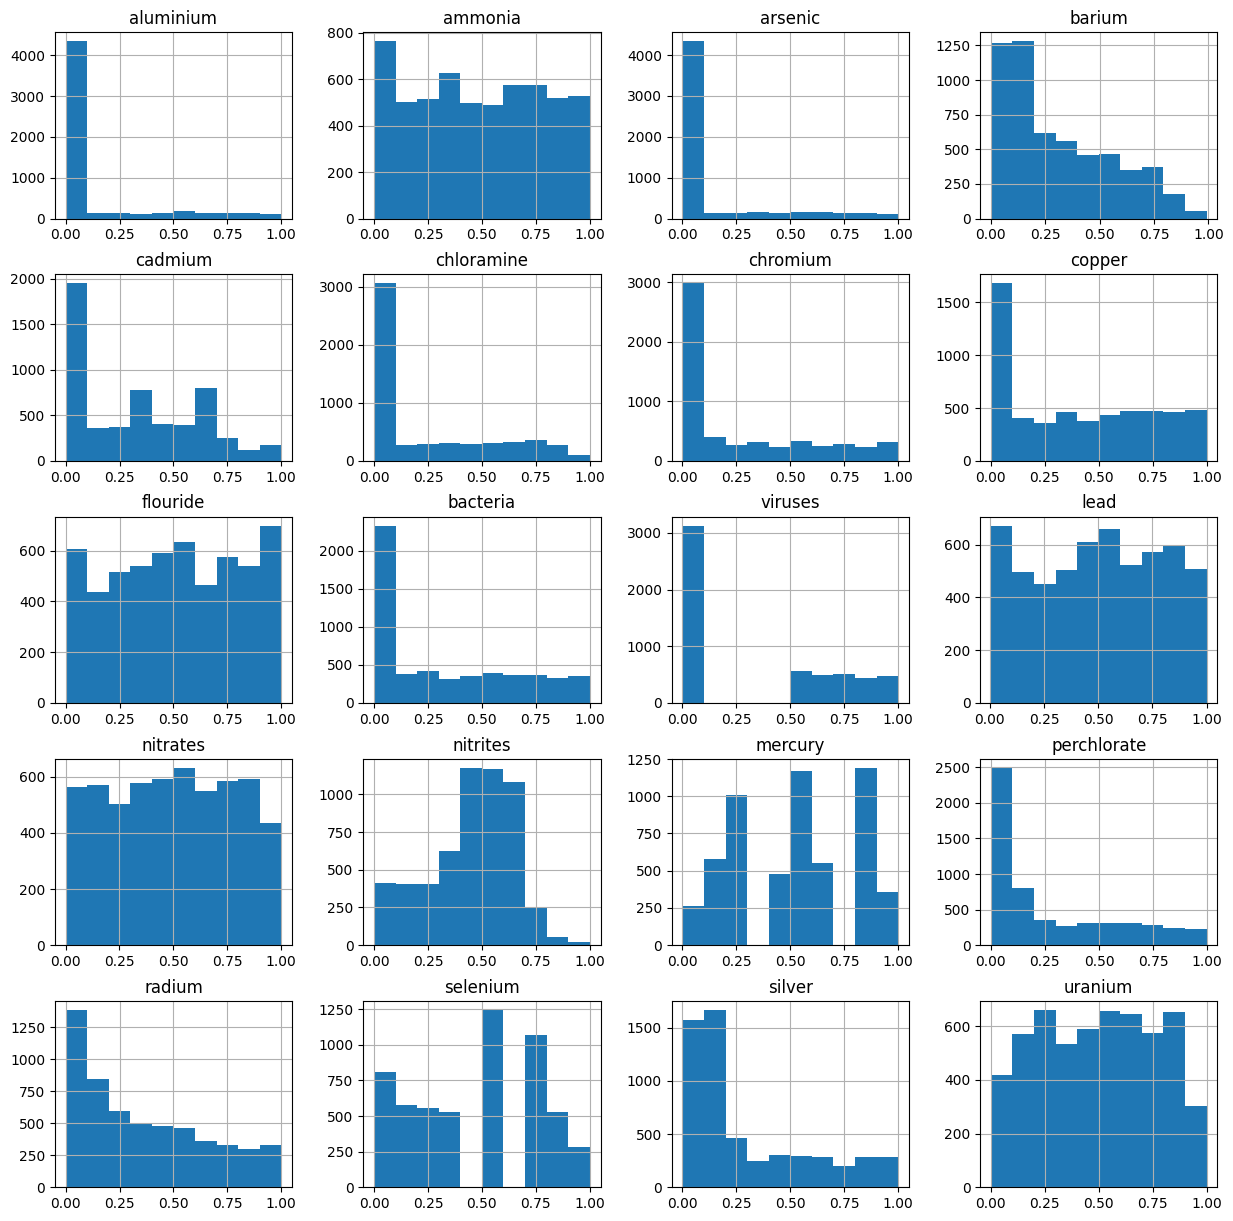

In [16]:
X_train.hist(figsize = (15, 15))
pass

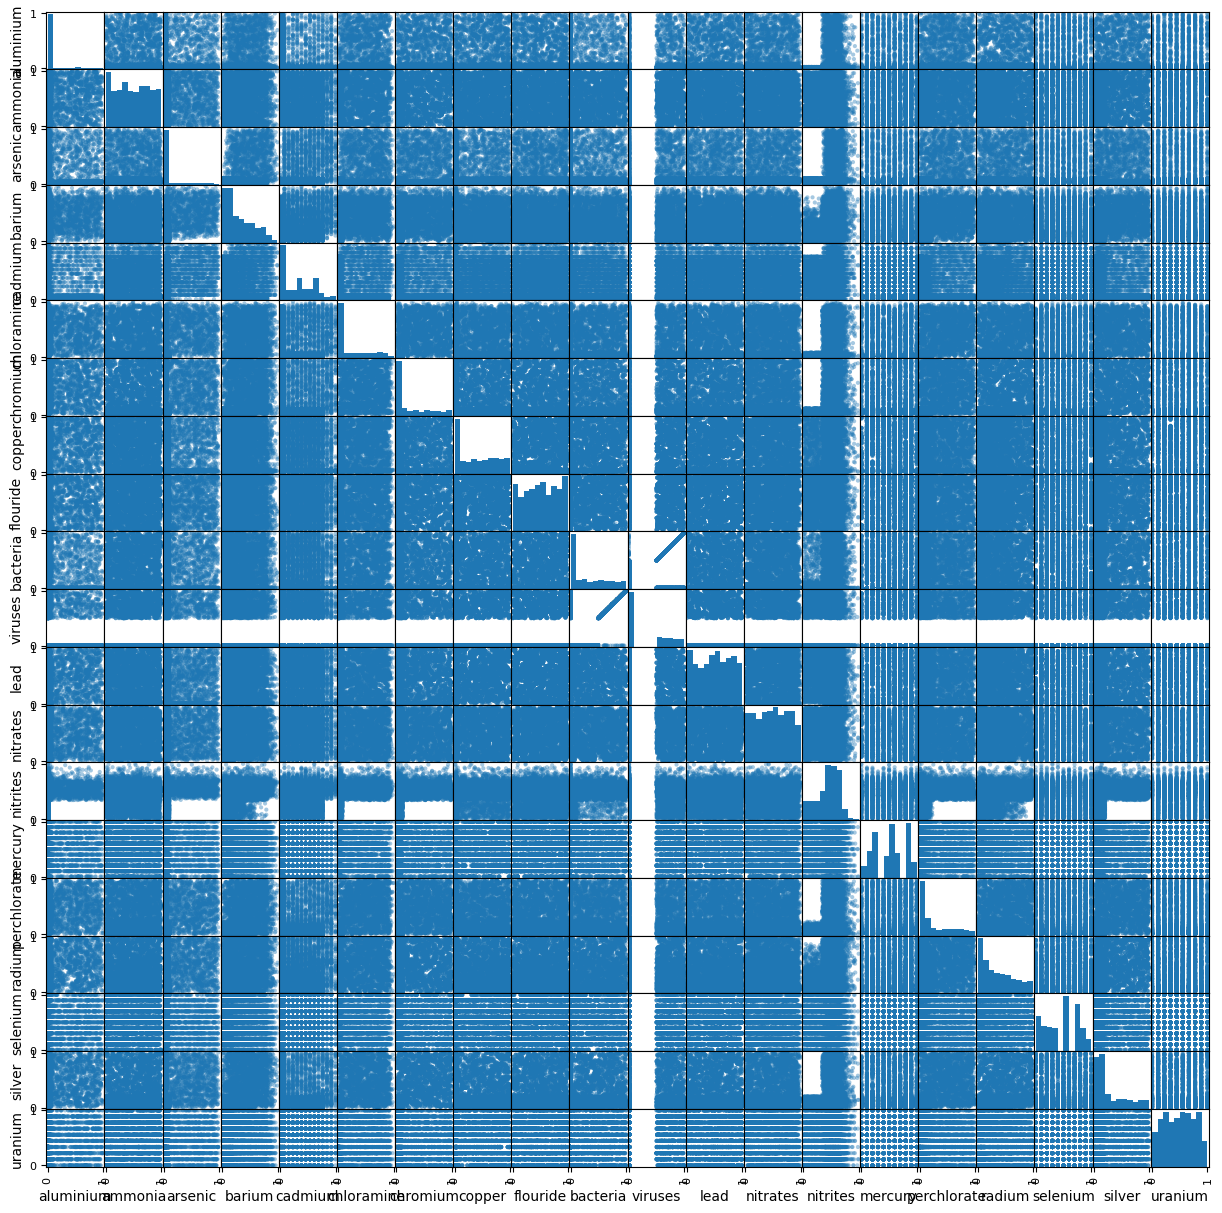

In [17]:
scatter_matrix(X_train, alpha = .40, figsize = (15, 15))
pass

### kNN

Проведём обучение kNN-классификатора. Методом кросс-валидации (параметр кросс-валидации: 5) для начала следует определить оптимальное значение гиперпараметра k:

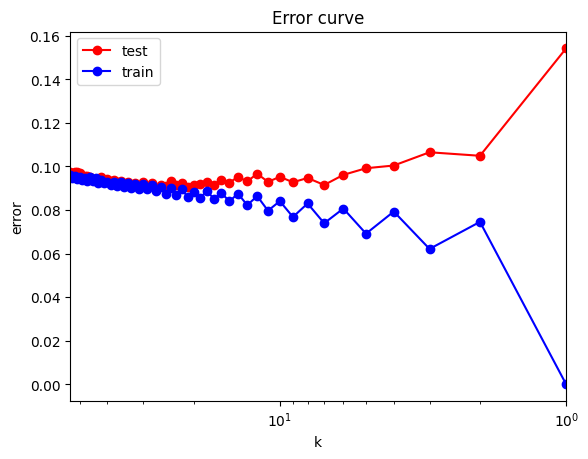

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

nnb = range(1, 55)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, return_train_score=True, cv=5)
grid.fit(X_train, y_train)

mean_train_score = grid.cv_results_['mean_train_score']
mean_train_error = 1.0 - mean_train_score

mean_test_score = grid.cv_results_['mean_test_score']
mean_test_error = 1.0 - mean_test_score

plt.semilogx(nnb, mean_test_error, 'r-o', label = 'test')
plt.semilogx(nnb, mean_train_error, 'b-o', label = 'train')
plt.xlim([np.max(nnb), np.min(nnb)])
plt.title('Error curve')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
pass

In [19]:
best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.08933279075705358 27


При данном оптимальном значении k проведём обучение kNN-классификатора:

In [20]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

Ошибки на обучающей и тестовой выборках:

In [21]:
y_train_predicted = knn.predict(X_train)
err_train = np.mean(y_train != y_train_predicted)

y_test_predicted = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predicted)

print(err_train, err_test)

0.08701089869572985 0.08670279283034597


Переобучения нет. Возможно есть небольшое недообучение, поскольку ошибка на обучающей выборке 8.7%, хотя ошибка в 8.67% на тестовой выборке является хорошим результатом. Примечательно, что ошибка на обучающей выборки больше, чем на тестовой. Возможно следует усложнить модель.

Основные метрики качества (precision, recall, ...):

In [22]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      2125
         1.0       0.89      0.27      0.42       274

    accuracy                           0.91      2399
   macro avg       0.90      0.63      0.69      2399
weighted avg       0.91      0.91      0.89      2399



В рамках поставленной задачи логичнее не допускать по-возможности ошибки в плане определения некачественной воды. Т.е. если образец воды в реальности является некачественным, а модель классифицировала этот образец как качественный, то это будет наихудшим сценарием (ошибка 2ого рода). Т.е. необходимо максимизировать метрику recall для класса 0.

С точки зрения kNN-классификатора, на этом наборе данных recall для класса 0 равен 1, что является идеальным результатом с точки зрения потребителя этой воды. Также значение метрики recall для класса 1 слишком маленькое - т.е. данный классификатор чаще будет отбраковывать качественную воду. Т.е. с точки зрения поставщика воды, который планировал заниматься продажей воды, это неприемлемый результат. Остальные 2 значения precision и recall не так важны. Такой неважный результат с точки зрения класса 1 возможно связан с малым количеством данных по классу 1.

### GBT

Проведём обучение GBT-классификатора. Методом кросс-валидации (параметр кросс-валидации: 5) для начала следует определить оптимальное значение количества деревьев:

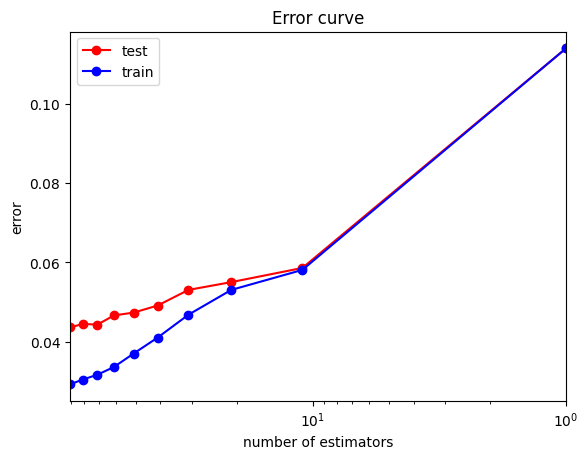

In [23]:
from sklearn import ensemble

n_estimators = range(1, 100, 10)
gbt = ensemble.GradientBoostingClassifier()
grid = GridSearchCV(gbt, param_grid = {'n_estimators': n_estimators}, return_train_score=True, cv=5)
grid.fit(X_train, y_train)

mean_train_score = grid.cv_results_['mean_train_score']
mean_train_error = 1.0 - mean_train_score

mean_test_score = grid.cv_results_['mean_test_score']
mean_test_error = 1.0 - mean_test_score

plt.semilogx(n_estimators, mean_test_error, 'r-o', label = 'test')
plt.semilogx(n_estimators, mean_train_error, 'b-o', label = 'train')
plt.xlim([np.max(n_estimators), np.min(n_estimators)])
plt.title('Error curve')
plt.xlabel('number of estimators')
plt.ylabel('error')
plt.legend()
pass

In [24]:
best_cv_err = 1 - grid.best_score_
best_n_estimators = grid.best_estimator_.n_estimators
print(best_cv_err, best_n_estimators)

0.043595046597727505 91


При данном оптимальном значении n_estimators проведём обучение GBT-классификатора:

In [25]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = best_n_estimators)
gbt.fit(X_train, y_train)
pass

Ошибки на обучающей и тестовой выборках:

In [26]:
y_train_predicted = gbt.predict(X_train)
err_train = np.mean(y_train != y_train_predicted)

y_test_predicted = gbt.predict(X_test)
err_test  = np.mean(y_test  != y_test_predicted)

print(err_train, err_test)

0.030909415758442024 0.04210087536473531


Переобучения и недообучения нет. Теперь ошибка на обучающей выборки меньше, чем на тестовой.

Основные метрики качества (precision, recall, ...):

In [27]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2125
         1.0       0.91      0.70      0.79       274

    accuracy                           0.96      2399
   macro avg       0.94      0.84      0.88      2399
weighted avg       0.96      0.96      0.96      2399



По сравнению с kNN-классификатором, значение recall для класса 1 стало намного лучше. Ухудшилось на 0.01 значение recall для класса 0, но с учётом существенного прироста в значении recall для класса 1, GBT-классификатор более предпочтителен в использовании.

### Многослойный персептрон

Проведём обучение многослойного персептрона. Методом кросс-валидации (параметр кросс-валидации: 5) для начала следует определить оптимальное значение количества слоёв и нейронов в каждом слое:

In [33]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [[1, 100], [2, 50], [3, 25], [2, 100], [3, 50], [4, 25]]
mlp = MLPClassifier()
grid = GridSearchCV(mlp,
                    param_grid = {'hidden_layer_sizes': hidden_layer_sizes, 
                                  'max_iter': [300],
                                  'solver': ['adam'],
                                  'activation': ['relu']},
                    return_train_score=True,
                    cv=5)
grid.fit(X_train, y_train)
pass

C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_netw

In [34]:
best_cv_err = 1 - grid.best_score_
best_hidden_layer_sizes = grid.best_estimator_.hidden_layer_sizes
print(best_cv_err, best_hidden_layer_sizes)

0.053243329503383174 [3, 50]


При данном оптимальном значении hidden_layer_sizes проведём обучение многослойного персептрона:

In [35]:
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, max_iter=300, solver='adam', activation='relu')
mlp.fit(X_train, y_train)
pass

C:\Users\polya\MLCourseEnv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Ошибки на обучающей и тестовой выборках:

In [36]:
y_train_predicted = mlp.predict(X_train)
err_train = np.mean(y_train != y_train_predicted)

y_test_predicted = mlp.predict(X_test)
err_test  = np.mean(y_test  != y_test_predicted)

print(err_train, err_test)

0.04824012864034304 0.05543976656940392


Переобучения и недообучения нет. Ошибка на обучающей выборки меньше, чем на тестовой.

Основные метрики качества (precision, recall, ...):

In [37]:
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2125
         1.0       0.89      0.58      0.71       274

    accuracy                           0.94      2399
   macro avg       0.92      0.79      0.84      2399
weighted avg       0.94      0.94      0.94      2399



По сравнению с GBT-классификатором, значение recall для класса 1 ухудшилось. В итоге, на основании проведенного анализа, GBT-классификатор более предпочтителен в использовании. Предсказательная способность GBT-классификатора приемлема.